In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("zomato_restaurants_in_India.csv")

# Display the first few rows of the dataset
df.head()


    res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra 

In [23]:
# 1. Identify and handle missing values
# Checking for missing values
df.isnull().sum()


res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
num_cuisines            0
serves_vegetarian       0
has_online_delivery     0
dtype: int64


In [24]:

# Handling missing values - you can choose to fill with a placeholder, mean or median, or drop
df = df.fillna({
    'aggregate_rating': df['aggregate_rating'].mean(),  # Example: Fill missing ratings with the mean rating
    'timings': 'Not available'  # Example: Fill missing timings with 'Not available'
})
# Alternatively, to drop rows with any missing values you can uncomment the next line
# df = df.dropna()

In [25]:
# 2. Detect and correct any inconsistencies in data types
# Convert 'aggregate_rating' to float if it's not already
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')

In [38]:
# Convert 'price_range' to an appropriate numeric type
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')

In [26]:
# Ensuring 'city' is of type string
df['city'] = df['city'].astype(str)

In [27]:
# 3. Feature engineering
# Example: Extract number of cuisines offered by each restaurant
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

In [28]:
# Example: Extracting whether the restaurant has online delivery or not from highlights
df['has_online_delivery'] = df['highlights'].apply(lambda x: 'Online Delivery' in x)

In [39]:
# Display the first few rows to see the changes
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,num_cuisines,serves_vegetarian,has_online_delivery
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,4.4,Very Good,814,154,0.0,-1,-1,5,0,False
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,4.4,Very Good,1203,161,0.0,-1,-1,6,0,False
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,4.2,Very Good,801,107,0.0,1,-1,2,0,False
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,4.3,Very Good,693,157,0.0,1,-1,4,0,False
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,4.9,Excellent,470,291,0.0,1,-1,3,0,False


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(df[['aggregate_rating', 'price_range', 'num_cuisines']].describe())

Descriptive Statistics:
       aggregate_rating    price_range   num_cuisines
count     211944.000000  211944.000000  211944.000000
mean           3.395937       1.882535       2.610605
std            1.283642       0.892989       1.607002
min            0.000000       1.000000       1.000000
25%            3.300000       1.000000       1.000000
50%            3.800000       2.000000       2.000000
75%            4.100000       2.000000       4.000000
max            4.900000       4.000000       9.000000


C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


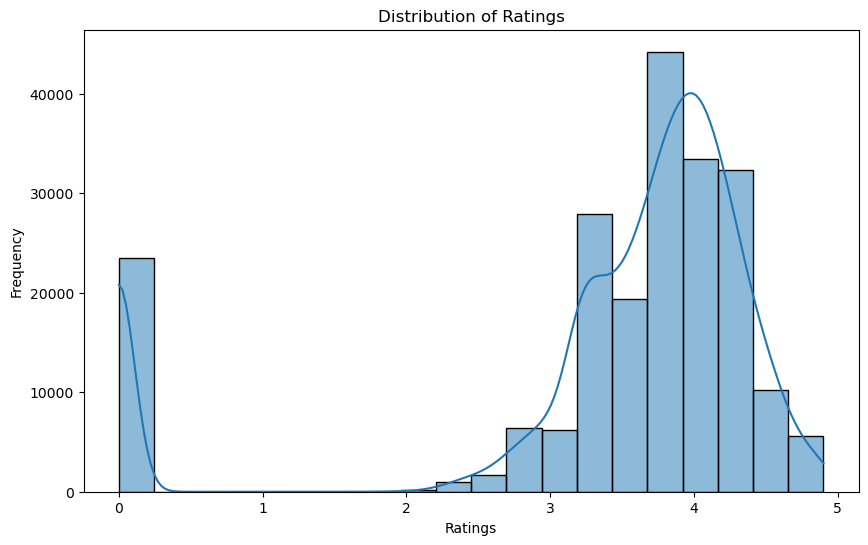

In [36]:
# 2. Distribution Analysis
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

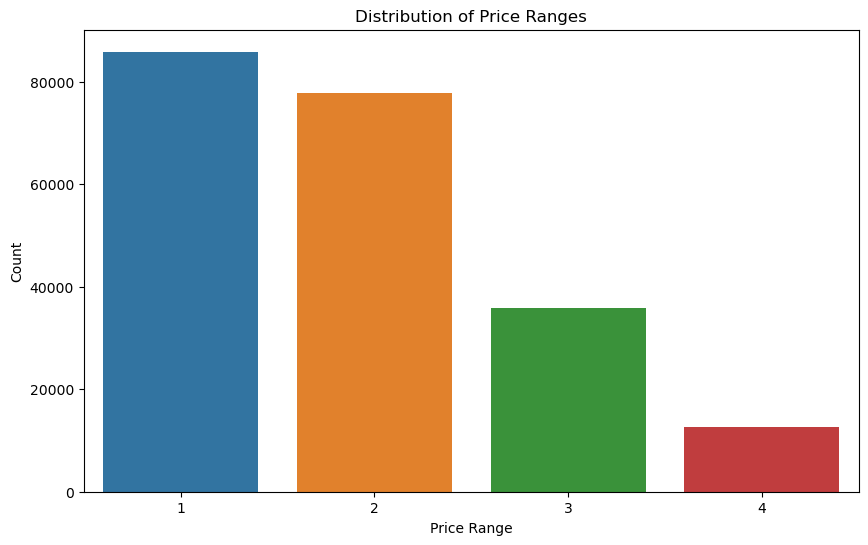

In [37]:
# Price Range Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


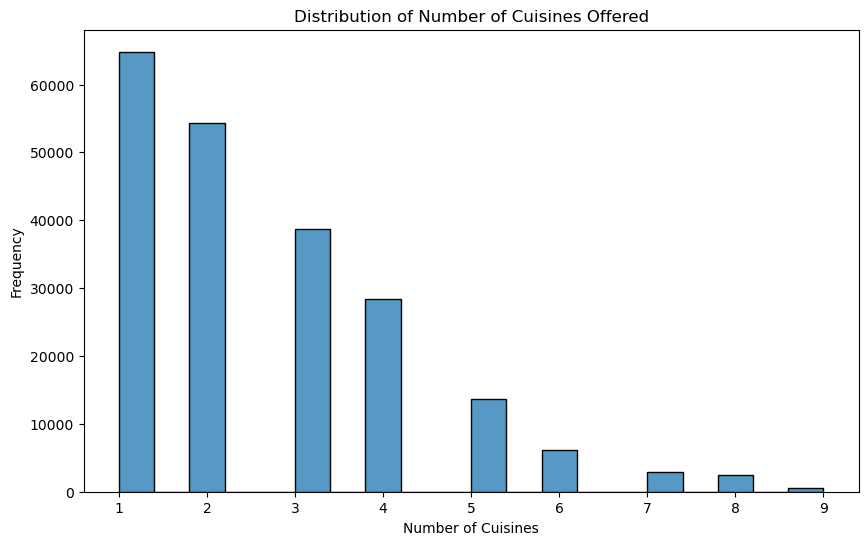

In [40]:
# Number of Cuisines Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['num_cuisines'], bins=20, kde=False)
plt.title('Distribution of Number of Cuisines Offered')
plt.xlabel('Number of Cuisines')
plt.ylabel('Frequency')
plt.show()

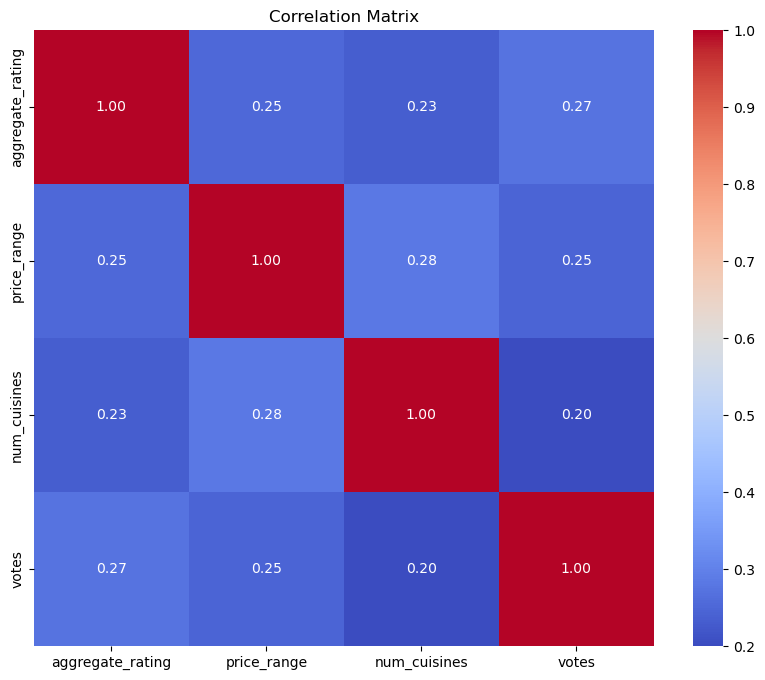

In [41]:
# 3. Correlation Analysis
# Correlation heatmap
correlation_matrix = df[['aggregate_rating', 'price_range', 'num_cuisines', 'votes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Group data by city
city_data = df.groupby('city').agg({
    'aggregate_rating': 'mean',  # Average rating per city
    'price_range': 'mean',       # Average price range per city
    'num_cuisines': 'mean',      # Average number of cuisines per city
    'res_id': 'count'            # Count of restaurants (to measure density)
}).rename(columns={'res_id': 'restaurant_count'}).reset_index()

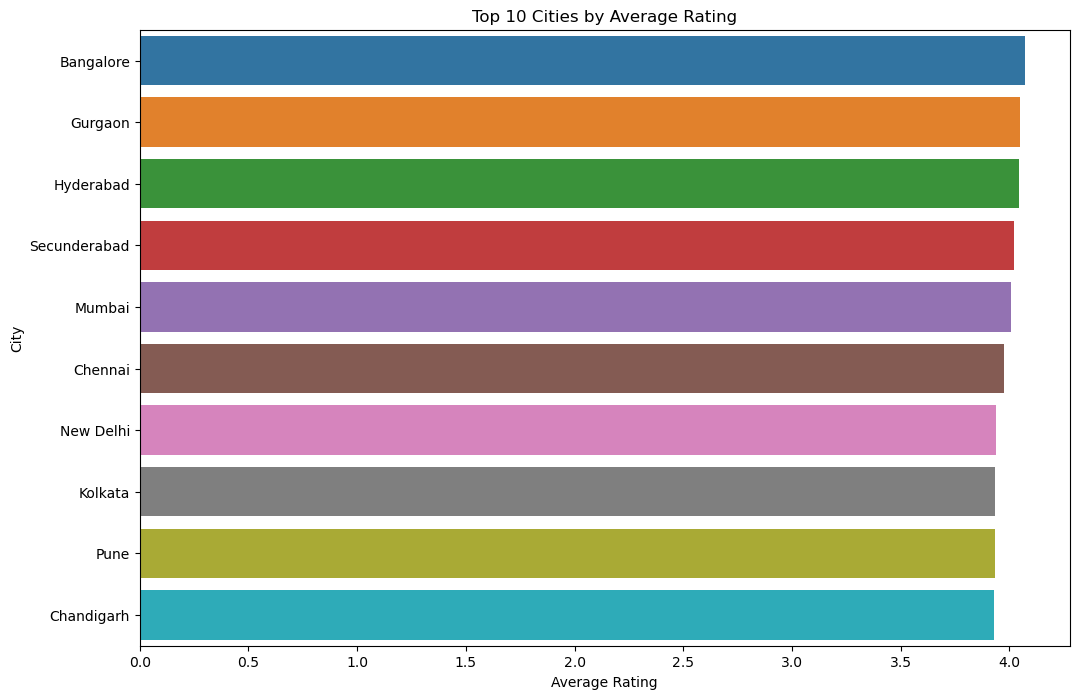

In [44]:
# Sort by average rating for visualization
city_data_sorted = city_data.sort_values(by='aggregate_rating', ascending=False)

# Visualization: Average Rating by City
plt.figure(figsize=(12, 8))
sns.barplot(x='aggregate_rating', y='city', data=city_data_sorted.head(10))
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

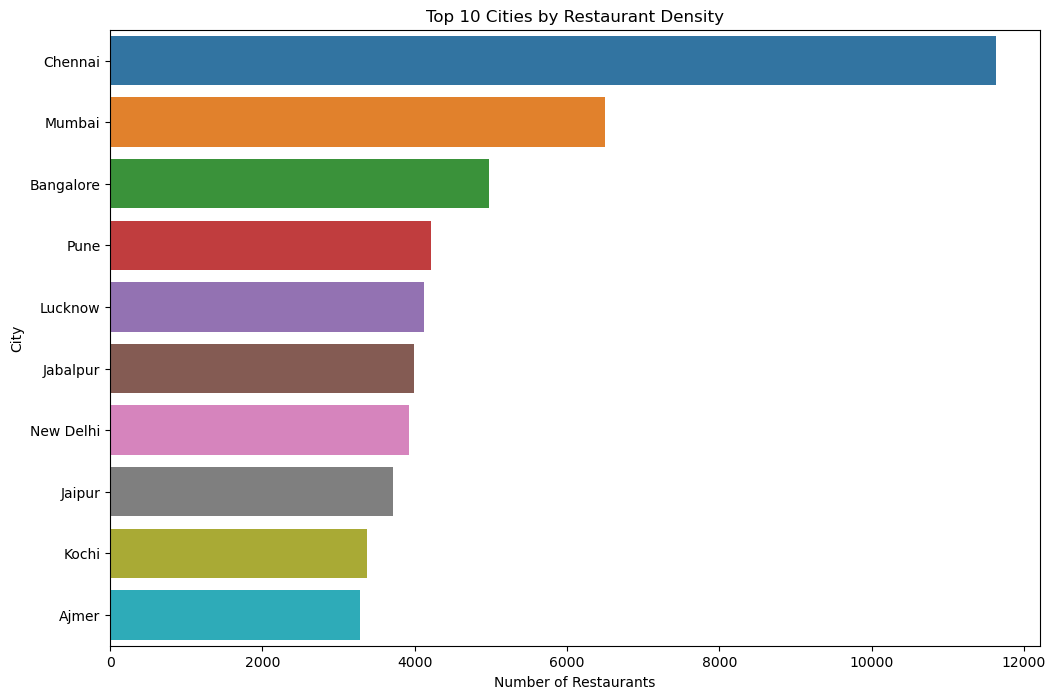

In [45]:
# Visualization: Restaurant Density by City
city_density_sorted = city_data.sort_values(by='restaurant_count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='restaurant_count', y='city', data=city_density_sorted.head(10))
plt.title('Top 10 Cities by Restaurant Density')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

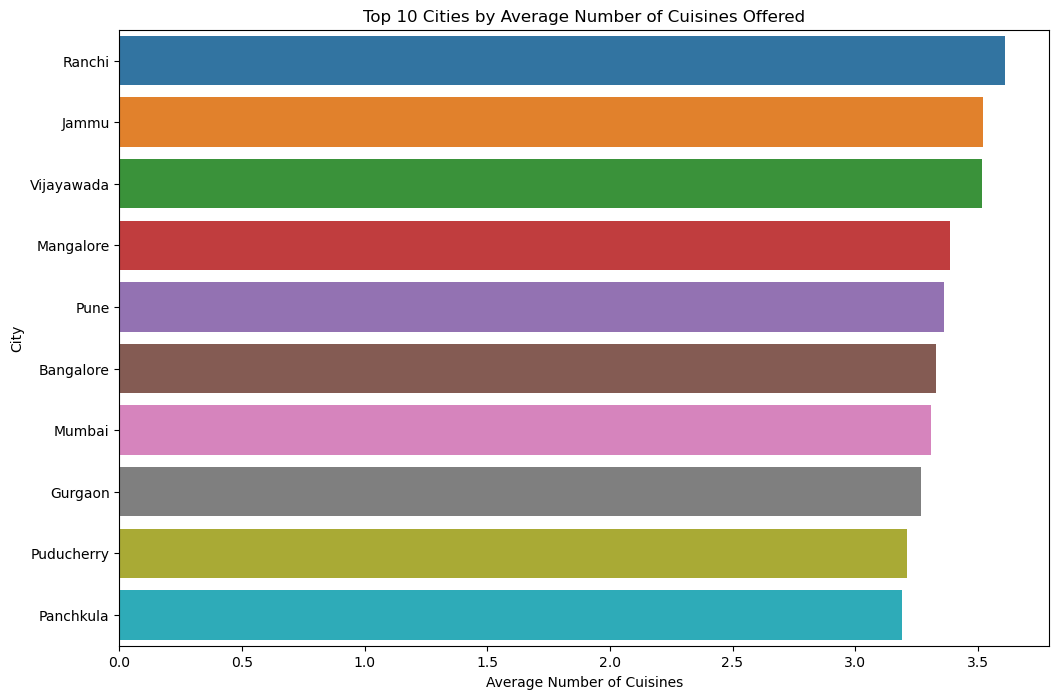

In [46]:
# Visualization: Average Number of Cuisines Offered by City
city_cuisines_sorted = city_data.sort_values(by='num_cuisines', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='num_cuisines', y='city', data=city_cuisines_sorted.head(10))
plt.title('Top 10 Cities by Average Number of Cuisines Offered')
plt.xlabel('Average Number of Cuisines')
plt.ylabel('City')
plt.show()

In [47]:
# Optional detailed report per city if needed
print(city_data)

          city  aggregate_rating  price_range  num_cuisines  restaurant_count
0         Agra          3.493860     1.982075      2.614035              2622
1    Ahmedabad          3.813978     2.232132      2.212207              3162
2        Ajmer          3.554623     1.462923      3.119011              3277
3    Alappuzha          0.858842     1.559979      1.918304              1934
4    Allahabad          3.485248     2.258629      2.370213              2115
..         ...               ...          ...           ...               ...
94    Varanasi          3.667730     2.445319      2.699254              2414
95     Vellore          2.987788     1.364977      2.257604              2170
96  Vijayawada          3.618026     1.765987      3.518999              2158
97       Vizag          3.640094     1.902003      2.725607              2347
98    Zirakpur          3.236576     1.883268      3.077821               257

[99 rows x 5 columns]


Top cuisines in Mumbai:
        city cuisines_list  count
2679  Mumbai  North Indian   2444
2636  Mumbai       Chinese   1735
2617  Mumbai         Asian   1565
2638  Mumbai   Continental   1516
2656  Mumbai       Italian   1372


Top cuisines in Delhi:
Empty DataFrame
Columns: [city, cuisines_list, count]
Index: []


Top cuisines in Bangalore:
          city cuisines_list  count
409  Bangalore  North Indian   2124
373  Bangalore   Continental   1632
354  Bangalore         Asian   1055
371  Bangalore       Chinese   1006
387  Bangalore       Italian    840


Top cuisines in Kolkata:
         city cuisines_list  count
2159  Kolkata       Chinese    779
2193  Kolkata  North Indian    751
2143  Kolkata         Asian    453
2161  Kolkata   Continental    453
2171  Kolkata       Italian    387


Top cuisines in Chennai:
        city cuisines_list  count
665  Chennai  North Indian   4647
626  Chennai       Chinese   2731
628  Chennai   Continental   2528
678  Chennai  South Indian   2115
611 

C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


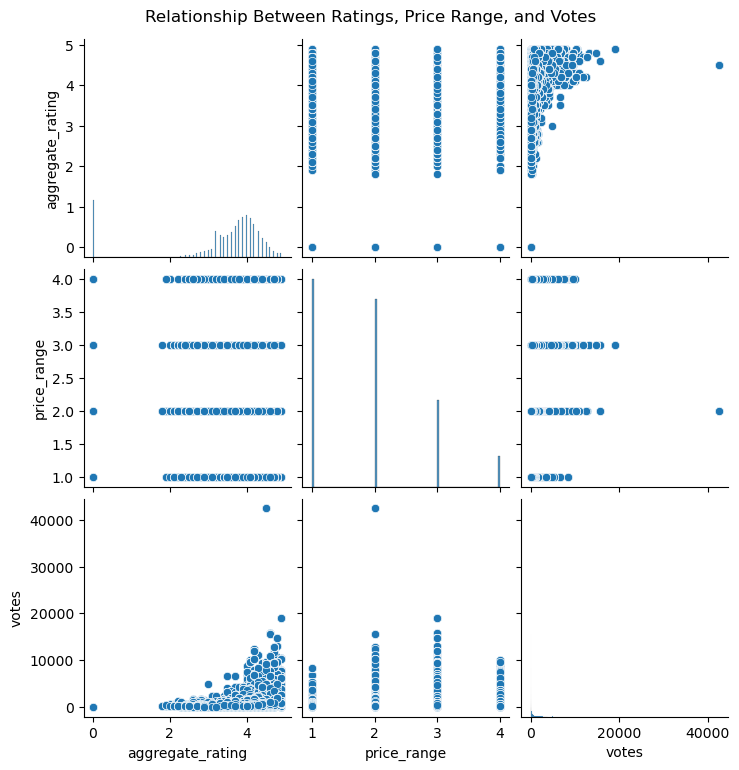

In [49]:
# Analyze the types of cuisines that are popular in different regions
# Split the cuisines and explode them to count each cuisine per city
df['cuisines_list'] = df['cuisines'].str.split(', ')
cuisine_exploded = df.explode('cuisines_list')
cuisine_popularity = cuisine_exploded.groupby(['city', 'cuisines_list']).size().reset_index(name='count')
cuisine_popularity_sorted = cuisine_popularity.sort_values(by='count', ascending=False)

# Display top cuisines in a few major cities
major_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai']
for city in major_cities:
    print(f"Top cuisines in {city}:")
    top_cuisines = cuisine_popularity_sorted[cuisine_popularity_sorted['city'] == city].head(5)
    print(top_cuisines)
    print("\n")

# Examine the relationship between restaurant ratings, price range, and popularity
# Popularity can be measured as the number of votes
sns.pairplot(df, vars=['aggregate_rating', 'price_range', 'votes'], kind='scatter')
plt.suptitle('Relationship Between Ratings, Price Range, and Votes', y=1.02)
plt.show()

